# Tutorial on how to open, visualize and extract some features from a .mhd Image

This Tutorial will show how to:
    - Open and read a .mhd image
    - Visualize a .mhd image
    - Read a list of candidates from a .csv file
    - Transform from world coordinates to voxel coordinates
    - Extract some features / patches of candidates and visualize them
To be able to run this tutorial some python libraries / modules need to be installed:
    - Simple ITK: a library for handling and processing medical images
    - Numpy: a fundamental package for scientific computing with Python
    - PIL (Python Imaging Library): a library for adding image processing capabilities to your Python interpreter 
    - Matplotlib: a plotting library for the Python programming language

We start importing required modules / libraries  using the import command from python

In [1]:
import SimpleITK as sitk
import numpy as np
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

We define now a function to:
    - Open the image 
    - Store it into a numpy array
    - Extract the following info: Pixel Spacing, Origin
This function takes as input the name of the image and returns:
    - The array corresponding to the image (numpyImage)
    - Origin (numpyOrigin)
    - PixelSpacing (numpySpacing)

In [2]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
     
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
     
    return numpyImage, numpyOrigin, numpySpacing

To be able to open and read the list of candidates, we need to use the csv python module. 
We define now a function to:
    - Open a csv file
    - Read a csv file
    - Save each line of a csv file
This functions takes as input the name of the csv file and returns:
    - A list of each line of the csv

In [3]:
def readCSV(filename):
    lines = []
    with open(filename, "rb") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines

Since the coordinates of the candidates are given in World Coordinates, we now need to transform from world coordinates to voxel coordinates. 
We define now a function to do that. Please note that the transformation below is only valid if there is no rotation component in the transformation matrix. For all CT images in our dataset, there is no rotation component so that this formula can be used. 
This function takes as inputs:
    - The world coordinates
    - The origin
    - The pixel Spacing
This function returns:
    - Voxel coordinates (voxelCoord)

In [4]:
def worldToVoxelCoord(worldCoord, origin, spacing):
     
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

We want to extract now some features from the candidates. We define some normalized planes to extract views from the candidates

In [5]:
def normalizePlanes(npzarray):
     
    maxHU = 400.
    minHU = -1000.
 
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray>1] = 1.
    npzarray[npzarray<0] = 0.
    return npzarray

After having defined these auxiliary functions, we can now define the main part of our script.
First we:
    - Specify the path where the image (img_path) is 
    - Specificy the path where the file with the list of candidates is (cand_path)

In [6]:
img_path  = 'data/1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689.mhd'
cand_path = 'data/candidates.csv'

Using the function defined in line 2 we can:
    - Load the image
    - Extract the Origin
    - Extract the Pixel Spacing 

In [7]:
# load image
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
print numpyImage.shape
print numpyOrigin
print numpySpacing

(220, 512, 512)
[-308.25      180.        145.300003]
[ 1.25      0.703125  0.703125]


Using the function defined in line 3 we can:
    - Load the csv file
    - Get the candidates 
Using the function defined in line 4 we can: 
    - Transform from world to voxel coordinates

In [8]:
# load candidates
cands = readCSV(cand_path)
print cands
# get candidates
for cand in cands[1:]:
    worldCoord = np.asarray([float(cand[3]),float(cand[2]),float(cand[1])])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 65

[['seriesuid', 'coordX', 'coordY', 'coordZ', 'label'], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689', '-90.19223826', '32.90770422', '-127.7387685', '1'], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689', '-91.41096549', '41.66040727', '-126.2673992', '1'], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689', '-100.53', '29.42', '-97.78', '1'], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689', '-118.1915915', '-23.40282918', '-111.3254184', '1'], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689', '-126.2155623', '-0.343906548', '-213.1295918', '1'], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689', '29.74', '63.74', '-196.7', '1'], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689', '-93.94417155', '28.81655646', '-130.2151135', '1']]


Using the function defined in line 5 we can:
    - Extract patch for each candidate in the list
    - Visualize each patch
    - Save each page as image in .tiff format

data
[-127.7387685    32.90770422  -90.19223826]
[ 144.4089852   209.19793178  334.92229868]
[[ 1.          1.          1.         ...,  0.78142857  0.73857143
   0.43214286]
 [ 1.          1.          1.         ...,  0.73071429  0.83285714
   0.80714286]
 [ 1.          0.92        0.79928571 ...,  0.77571429  0.49642857
   0.74571429]
 ..., 
 [ 0.23285714  0.18285714  0.16       ...,  0.16071429  0.11714286
   0.08857143]
 [ 0.24142857  0.065       0.00357143 ...,  0.06357143  0.19        0.21      ]
 [ 0.14857143  0.09        0.14571429 ...,  0.10571429  0.00428571
   0.03857143]]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


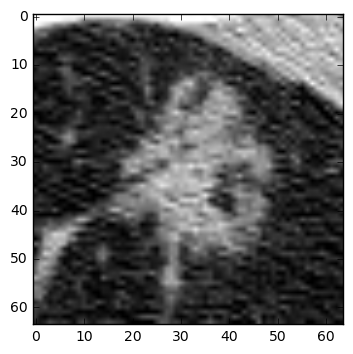

IOError: [Errno 2] No such file or directory: 'patches/patch_-127.7387685_32.90770422_-90.19223826.tiff'

In [9]:
for cand in cands[1:]:
    worldCoord = np.asarray([float(cand[3]),float(cand[2]),float(cand[1])])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 65
    patch = numpyImage[voxelCoord[0],voxelCoord[1]-voxelWidth/2:voxelCoord[1]+voxelWidth/2,voxelCoord[2]-voxelWidth/2:voxelCoord[2]+voxelWidth/2]
    patch = normalizePlanes(patch)
    print 'data'
    print worldCoord
    print voxelCoord
    print patch
    outputDir = 'patches/'
    plt.imshow(patch, cmap='gray')
    plt.show()
    Image.fromarray(patch*255).convert('L').save(os.path.join(outputDir, 'patch_' + str(worldCoord[0]) + '_' + str(worldCoord[1]) + '_' + str(worldCoord[2]) + '.tiff'))
 